In [2]:
# 向MNIST数据集添加白噪声通道
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))],
    axis=1
)
train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1
)

In [3]:
# 训练相同的模型
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='rmsprop',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = get_model()
history_noise = model.fit(train_images_with_noise_channels, train_labels, epochs=10, batch_size=128, validation_split=0.2)

model = get_model()
history_zeros = model.fit(train_images_with_zeros_channels, train_labels, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 1s 2ms/step - loss: 0.6233 - accuracy: 0.8081 - val_loss: 0.2630 - val_accuracy: 0.9230
Epoch 2/10
375/375 [==============================] - 1s 2ms/step - loss: 0.2503 - accuracy: 0.9221 - val_loss: 0.1844 - val_accuracy: 0.9448
Epoch 3/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1638 - accuracy: 0.9486 - val_loss: 0.1363 - val_accuracy: 0.9597
Epoch 4/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1157 - accuracy: 0.9631 - val_loss: 0.1204 - val_accuracy: 0.9646
Epoch 5/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0848 - accuracy: 0.9725 - val_loss: 0.1364 - val_accuracy: 0.9617
Epoch 6/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0633 - accuracy: 0.9795 - val_loss: 0.1399 - val_accuracy: 0.9637
Epoch 7/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0475 - accuracy: 0.9844 - val_loss: 0.1099 - val_accuracy: 0.9695
Epoch 

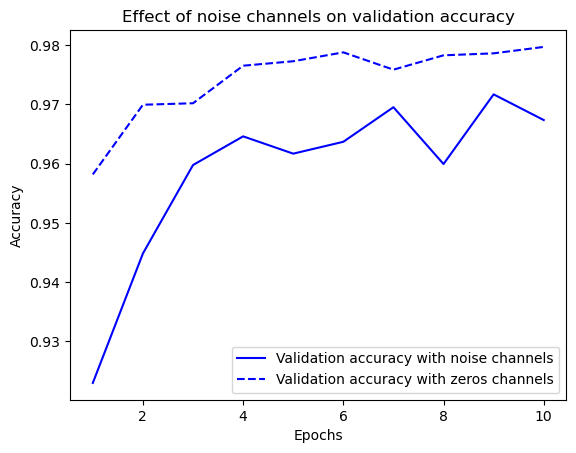

In [4]:
import matplotlib.pyplot as plt

val_acc_noise = history_noise.history['val_accuracy']
val_acc_zeros = history_zeros.history['val_accuracy']
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, 'b-', label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, 'b--', label='Validation accuracy with zeros channels')
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [ ]:
# 简单留出验证
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
num_validation_samples = 10000
np.random.shuffle(train_images)
validation_data = train_images[:num_validation_samples]
training_data = train_images[num_validation_samples:]
model = get_model()
model.fit(training_data, ...)
validation_score = model.evaluate(validation_data, ...)
# 对模型进行调节、重新训练、评估...
# 调节好模型的超参之后，在所有非测试集数据上从头开始训练数据
model = get_model()
model.fit(np.concatenate([training_data, validation_data]), ...)
test_score = model.evaluate(test_images, test_labels)

In [ ]:
# K折验证
k = 3
num_validation_samples = len(train_images) // k
np.random.shuffle(train_images)
validation_scores = []
for fold in range(k):
    validation_data = train_images[num_validation_samples * fold: num_validation_samples * (fold + 1)]
    traing_data = np.concatenate(
        train_images[:num_validation_samples * fold],
        train_images[num_validation_samples * (fold + 1):]
    )
    model = get_model()
    model.fit(traing_data, ...)
    validation_score = model.evaluate(validation_data, ...)
    validation_scores.append(validation_score)
validation_score = np.average(validation_scores)
# 在所有非测试数据上训练最终模型
model = get_model()
model.fit(train_images, ...)
test_score = model.evaluate(test_images, test_labels)

In [18]:
# L2权重正则化
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation='relu'),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation='relu'),
    layers.Dense(1, activation="sigmoid") 
])
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=1000)
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

history_l2_reg = model.fit(x_train, y_train, epochs=20, batch_size=512, validation_split=0.4)

[0. 1. 1. ... 0. 0. 0.]
Epoch 1/20
30/30 [==============================] - 1s 25ms/step - loss: 0.6645 - accuracy: 0.6640 - val_loss: 0.5829 - val_accuracy: 0.8028
Epoch 2/20
30/30 [==============================] - 0s 10ms/step - loss: 0.5481 - accuracy: 0.8162 - val_loss: 0.5087 - val_accuracy: 0.8485
Epoch 3/20
30/30 [==============================] - 0s 9ms/step - loss: 0.4759 - accuracy: 0.8507 - val_loss: 0.4527 - val_accuracy: 0.8577
Epoch 4/20
30/30 [==============================] - 0s 8ms/step - loss: 0.4201 - accuracy: 0.8653 - val_loss: 0.4259 - val_accuracy: 0.8513
Epoch 5/20
30/30 [==============================] - 0s 8ms/step - loss: 0.3918 - accuracy: 0.8657 - val_loss: 0.3963 - val_accuracy: 0.8579
Epoch 6/20
30/30 [==============================] - 0s 8ms/step - loss: 0.3762 - accuracy: 0.8713 - val_loss: 0.3887 - val_accuracy: 0.8593
Epoch 7/20
30/30 [==============================] - 0s 8ms/step - loss: 0.3634 - accuracy: 0.8736 - val_loss: 0.3848 - val_accuracy: 0

In [ ]:
# 使用Keras的权重正则化项
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

In [ ]:
# dropout层
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid") ])